# Timeseries at grid points and fit of a generalized logistic function
* ```Author          :``` ```stephanie.leroux@ocean-next.fr```

* ```Date            :``` Apr. 2018

* ```Purpose         :``` This notebook reads timeseries of 5-d ssh extracted from the OCCIPUT ensemble (50 members, 56 years 1960-2015), plots the timeseries and fits a generalized logistic function (using scipy.optimize.leastsq)

* ```Notes           :``` 
    - This notebook still needa some developments. The curve fitting is not yet satisfying near the origin. 
    - Also, it takes a while for the algorithm to converge, and as is, it is probably too slow to be used at each grid point of a map. 
    - The growth rate estimated via this metho requires a long timeseries including the upper asymptote in the end of the simulation (can't be applied on a short simu where saturation has not been reached). 
    - This notebook reads data across many files and i found out that the limit set on my mac was not enoughh (default: 256)so i need to increase the limit to 1024 (as it is on linux) with ```ulimit -n 1024``` in the terminal firtst.

## Load modules

In [2]:
## standart libraries
import os,sys
import numpy as np

from scipy.signal import argrelmax

# xarray
import xarray as xr

# fit function
from scipy import optimize

# plot
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Colormap
import matplotlib.dates as mdates

# wavelet (http://pycwt.readthedocs.io/en/latest/)
import pycwt as wavelet
from pycwt.helpers import find

%matplotlib inline 

## Define some functions for fit purposes

In [3]:
def genlogistic(B,t):
    # generalized logistic function with lower asymptote equals 0
    # https://en.wikipedia.org/wiki/Generalised_logistic_function
     y = B[5]+( (B[2]-B[5]) / ((B[1]+B[3]*np.exp(-B[0]*t))**(1./B[4])))
     return y

def errfunc(p,x,y):
   return y-genlogistic(p,x)


##  Specify data to load and some parameters

In [4]:
diri = "/Users/leroux/DATA/OCCIPUT_DATA/Ediags_data/SGR/fromCURIE/GP/"

diro = "/Users/leroux/Desktop/figstmp/"

GPlist=['GPGM','GPGS1','GPGS2','GPGS3','GPSX1','GPSX2','GPSX3','GPSX4','GPSX5']

CONFIGCASE ='ORCA025.L75-OCCITENS'
suffix = '5d_ssha.nc'
varna='ssh'

# Plot output
pltty='.png'
dpifig=200

## Read data

In [6]:
# read and concatenate all files in one array
count=0
for GPNA in GPlist :
    count=count+1
    GPtemp = xr.open_mfdataset(diri+GPNA+'.'+CONFIGCASE+'.???.'+suffix,concat_dim='e')[varna].assign_coords(GPloc=GPNA).expand_dims('GPloc')
    if (count==1):
        GPall =  GPtemp
    else:
        GPall = xr.concat((GPall, GPtemp),dim='GPloc')

GPallch = GPall

## Take intrinsic part of the signal only (remove ensemble mean)

In [7]:
predat = GPallch-GPallch.mean(axis=1) 

## Plot timeseries and fit a generalized logistic function with scipy.optimize.leastsq

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in multiply
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in true_divide
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


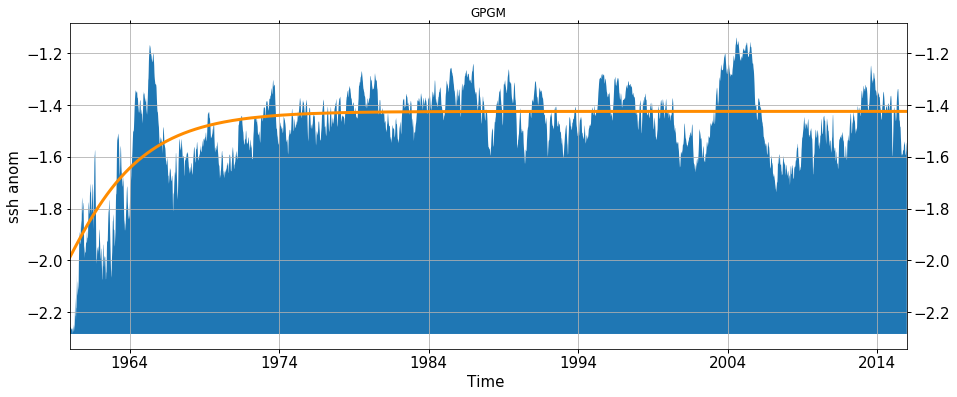

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in multiply
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in true_divide
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


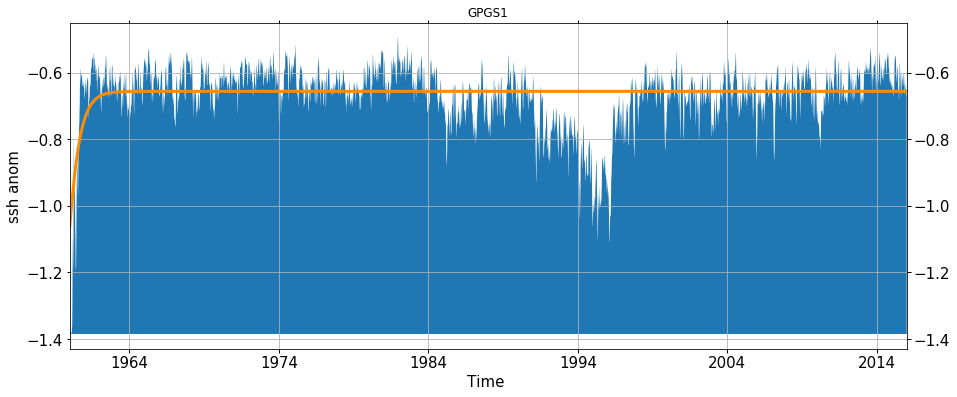

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in true_divide
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in multiply
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


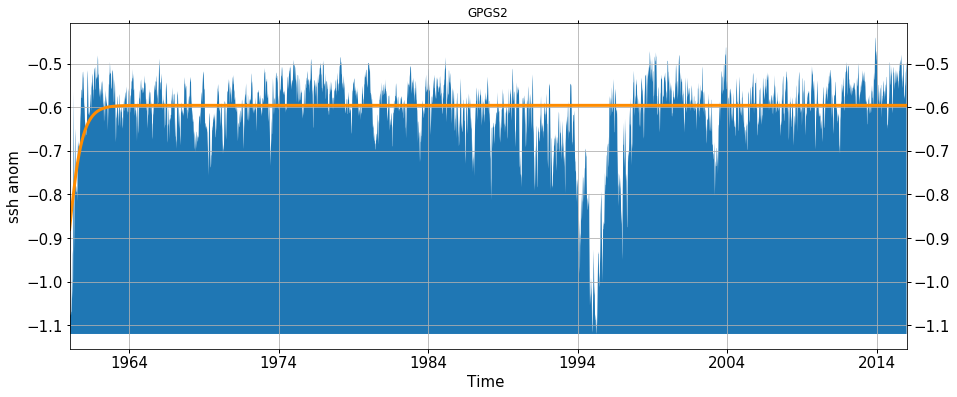

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in multiply
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in true_divide
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


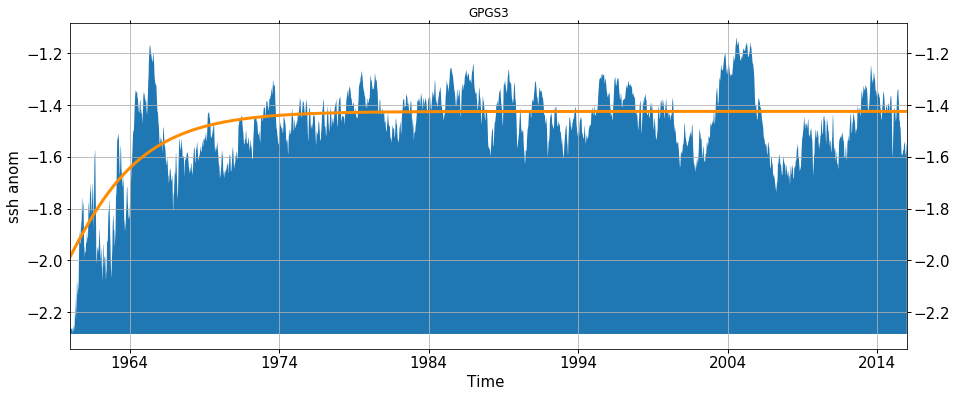

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in multiply
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in true_divide
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


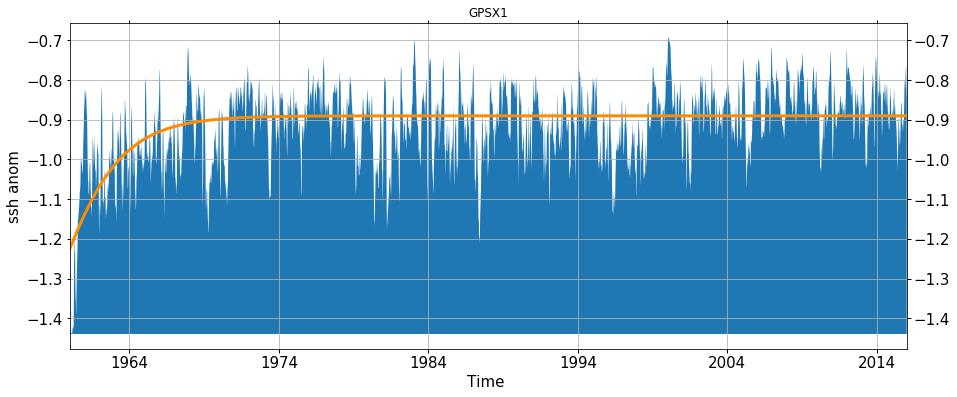

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in multiply
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in true_divide
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in true_divide
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'fals

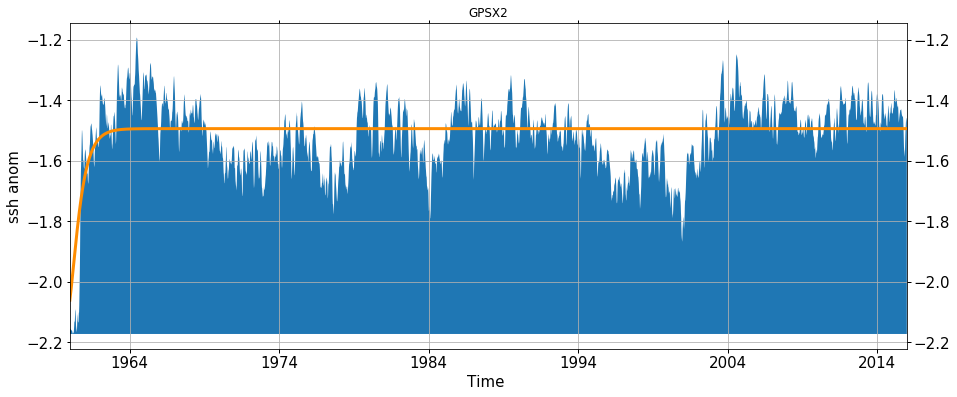

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in multiply
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in true_divide
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


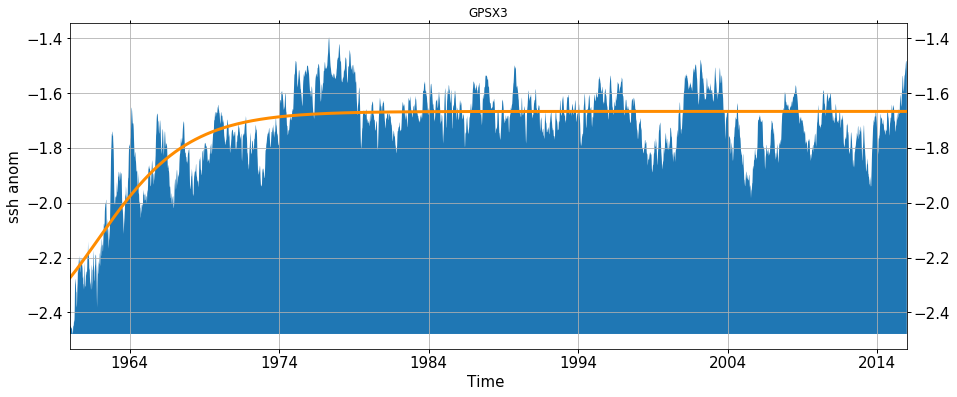

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in multiply
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in true_divide
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in true_divide
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'fals

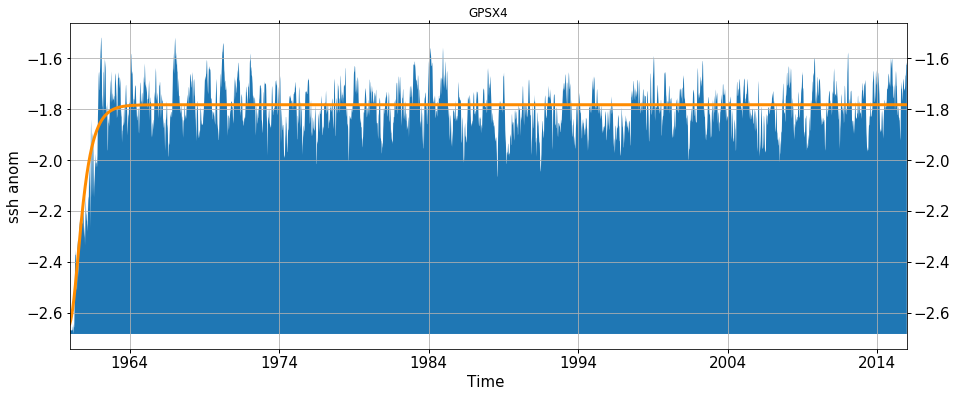

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in multiply
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in true_divide
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in power
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


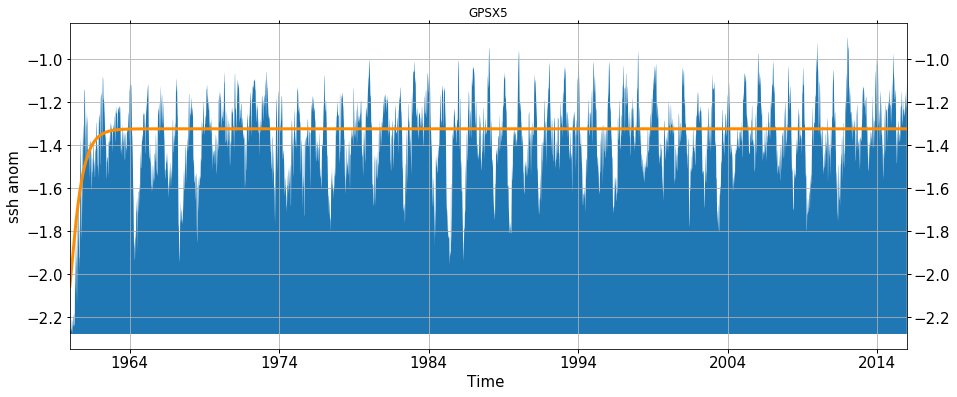

In [8]:
##### pltty = '.png'
ylab='ssh anom'
saveo = True
prefix='TSlogis.XGP.'


for GPLOC in GPlist[0:9]:
    predat = GPallch
    data = predat.sel(x=0,y=0,GPloc=GPLOC)
    
    data2plt_3 = data.std(axis=0)
    
    #data2plt_4 = data.std(axis=0).rolling(time_counter=20,center=True,min_periods=15).mean()
    
    y  = np.pad(data2plt_3,(700,0),'edge')
    x  = np.arange(1,y.size+1)

    # initial estimate of parameters 
    p0 = [1.,1.,1.,1.,1.,0.]
    
    # fit function
    fit = optimize.leastsq(errfunc,p0,args=(x,y),maxfev = 100000)
    
    
    plto = prefix+GPLOC

    fig1 = plt.figure(figsize=([15,6]),facecolor='white')

    # std enveloppe
    sym = -1.0*data2plt_3
    plt.fill_between(data2plt_3.time_counter.values,np.log10(data2plt_3).min(),np.log10(data2plt_3))  # .values otherwise probleme with time axis

    plt.plot(data2plt_3.time_counter,np.log10(genlogistic(fit[0],x)[700:]),linewidth=3.,color='darkorange')

    #plt.plot(tlmax, np.log10(data2plt_3.sel(time_counter=tlmax)), 'o',color='darkorange')

    plt.title(GPLOC)
    ax = plt.gca()
        #ax.axhline(y=0., xmin=0, xmax=1, linewidth=0.25,color='grey')
    
    # LOG Y axis 
    ax.grid(True, which='both') 
    ax.set_ylabel('SSHanom ', fontsize=15)
    ax.get_yaxis().set_tick_params(direction='out', width=1,labelsize=15)
    ax.yaxis.label.set_size(15)
    
    #---- X-Ticks *Time)
    ax.set_xlabel('Time ', fontsize=12)
    ax.get_xaxis().set_tick_params(direction='out', width=1,labelsize=15)
    ax.xaxis.label.set_size(15)

    plt.xlim(data2plt_3.time_counter.values[0],data2plt_3.time_counter.values[-1])
    

    plt.ylabel(ylab)

    ax.yaxis.set_label_position("left")
    plt.tick_params(axis="both", which="both", bottom="on", top="on",  
            labelbottom="on", labeltop='off',left="on", right="on", labelright="on",labelleft="on")  

    plt.show()

    # Save fig in png, resolution dpi
    fig1.savefig(diro+plto+pltty, facecolor=fig1.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#
  

---
## (Temp.) Used for tests of the curve fitting method:

Timeseries padded with zeros before intial time as an attempt to give more weight to the begining of the spread growth

0.07267444 0.005187002


/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


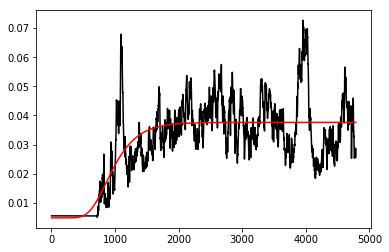

0.32025805 0.041220646


/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in power
  app.launch_new_instance()


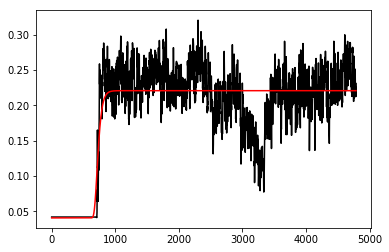

0.36311284 0.07584487


/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in power
  app.launch_new_instance()


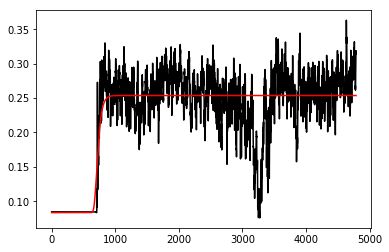

0.07267444 0.005187002


/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


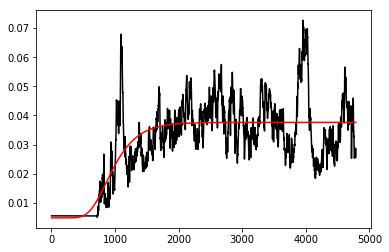

0.20278512 0.0363381


/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in power
  app.launch_new_instance()


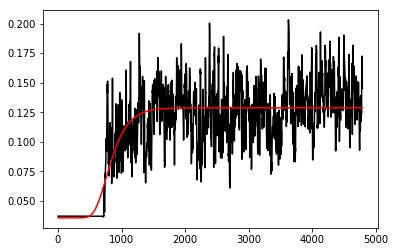

0.06413829 0.006720202


/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in power
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in true_divide
  app.launch_new_instance()


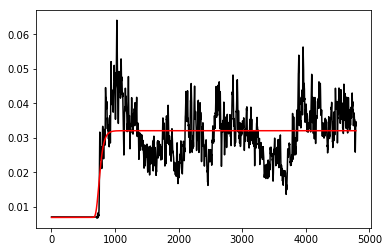

0.040075038 0.0033207866


/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in power
  app.launch_new_instance()


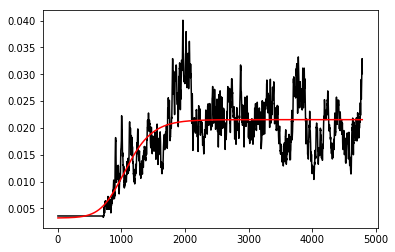

0.03037914 0.0020689396


/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in power
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in true_divide
  app.launch_new_instance()


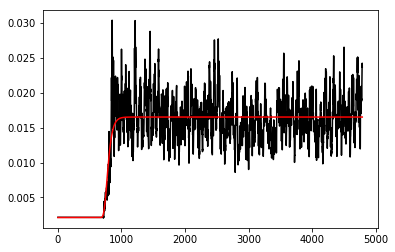

0.1259811 0.005273894


/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in power
  app.launch_new_instance()


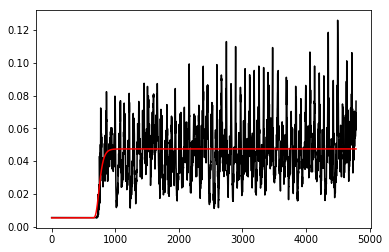

In [100]:
# good discussion here:  http://stackoverflow.com/questions/4308168/sigmoidal-regression-with-scipy-numpy-python-etc
# curve_fit() example from here: http://permalink.gmane.org/gmane.comp.python.scientific.user/26238
# other sigmoid functions here: http://en.wikipedia.org/wiki/Sigmoid_function

import numpy as np
import pylab
from scipy.optimize import curve_fit

def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y

def genlogistic(B,t):
    # generalized logistic function with lower asymptote equals 0
    # https://en.wikipedia.org/wiki/Generalised_logistic_function
     y = B[5]+( (B[2]-B[5]) / ((B[1]+B[3]*np.exp(-B[0]*t))**(1./B[4])))
     return y

def errfunc(p,x,y):
   return y-genlogistic(p,x)


from scipy import optimize

for GPLOC in GPlist[0:9]:
    data = predat.sel(x=0,y=0,GPloc=GPLOC)

    yyy = data.std(axis=0).values 
    #yyy = data.std(axis=0).rolling(time_counter=35,center=True,min_periods=1).mean().values  
    y  = np.pad(yyy,(700,0),'edge')
    x  = np.arange(1,y.size+1)
    
    print(max(y),min(y))

    # initial estimate of parameters 
    p0 = [1.,1.,1.,1.,1.,0.]
    
    # fit function
    fit = optimize.leastsq(errfunc,p0,args=(x,y),maxfev = 100000)

    #plt.plot(x,yyy,'b-')
    plt.plot(x,y,'k-')
    plt.plot(x,genlogistic(fit[0],x),'r-')
    #plt.xlim(0,1000)
    
    plt.show()

#bounds=bnds

---
## Notes and future developments  needed:
* Curve fitting not yet fully satisfying near the origin.
* Takes a while to converge, as it is probably too slow to be used at each grid point of a map.